In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

class Battleship:
    
    def __init__(self):
        self.reset()
        
    def spawn(self, m, direction = None, x = None, y = None):
        n = int(m)
        self.ships += n
        
        self.shipList[m] = n
        
        if direction == None:
            while True:
                direction = random.randrange(2)

                #x = random.randrange(11 - n)
                #y = random.randrange(11 - n)

                if direction == 0:
                    x = random.randrange(11 - n)
                    y = random.randrange(10)

                    if (self.matrix[y, x : x + n] == np.zeros(n)).all():
                        self.matrix[y, x : x + n] = m
                        self.shipLoc[m] = [(10 * y + x + i) for i in range(n)]
                        break

                elif direction == 1:
                    x = random.randrange(10)
                    y = random.randrange(11 - n)
                    
                    if (self.matrix[y : y + n, x] == np.zeros(n)).all():
                        self.matrix[y : y + n, x] = m
                        self.shipLoc[m] = [(10 * (y + i) + x) for i in range(n)]
                        break
                            
        else:
            if direction == 0: 
                self.matrix[y, x : x + n] = m
                self.shipLoc[m] = [(10 * y + x + i) for i in range(n)]
            elif direction == 1:
                self.matrix[y : y + n, x] = m
                self.shipLoc[m] = [(10 * (y + i) + x) for i in range(n)]
    
    '''
    def inflatedSpawn(self, m):
        
        n = int(m)
        self.ships += n
        
        self.shipList[m] = n
        
        while True:
            direction = random.randrange(2)

            x = random.randrange(10)
            y = random.randrange(10)

            if direction == 0:
                    
                if x + n > 10:
                    x -= n
                
                if (self.matrix[y, x : x + n] == np.zeros(n)).all():
                    if y > 0:
                        if (self.matrix[y - 1, x : x + n] != np.zeros(n)).any():
                            continue
                    if y < 9:
                        if (self.matrix[y + 1, x : x + n] != np.zeros(n)).any():
                            continue
                    if x > 0:
                        if self.matrix[y, x - 1] != 0:
                            continue
                    if x + n < 10:
                        if self.matrix[y, x + n] != 0:
                            continue
                    
                    self.matrix[y, x : x + n] = m
                    self.shipLoc[m] = [(10 * y + x + i) for i in range(n)]
                    break

            elif direction == 1:
                    
                if y + n > 10:
                    y -= n
                            
                if (self.matrix[y : y + n, x] == np.zeros(n)).all():
                    
                    if x > 0:
                        if (self.matrix[y : y + n, x - 1] != np.zeros(n)).any():
                            continue
                    if x < 9:
                        if (self.matrix[y : y + n, x + 1] != np.zeros(n)).any():
                            continue
                            
                    if y > 0:
                        if self.matrix[y - 1, x] != 0:
                            continue
                    if y + n < 10:
                        if self.matrix[y + n, x] != 0:
                            continue
                            
                    self.matrix[y : y + n, x] = m
                    self.shipLoc[m] = [(10 * (y + i) + x) for i in range(n)]
                    break
        '''
    def action_space(self):
        moveList = []
        for y in range(10):
            for x in range(10):
                if self.fired[y][x] == 0:
                    moveList.append(10 * y + x)
        
        return random.choice(moveList)
    
    def step(self, action):
        
        y = action // 10
        x = action % 10
        
        if self.fired[y][x] != 0:
            info = "Invalid move"
            print(info)
        else:
            self.fired[y][x] = 0.5
            self.history.pop(0)
            self.history.append(action)
            self.score += 1
            
            if self.matrix[y][x] != 0:
                info = "Hit"
                self.hitCount += 1
                self.fired[y][x] = 1
                self.ships -= 1
                self.shipList[self.matrix[y][x]] -= 1
                if self.shipList[self.matrix[y][x]] == 0:
                    info = f"Dead {self.matrix[y][x]}"
                    self.deadCount += int(self.matrix[y][x])
                    self.deadShipLoc[self.matrix[y][x]] = self.shipLoc[self.matrix[y][x]]
            else:
                info = "Miss"
                
            self.matrix[y][x] = -1
        
        observation = self.fired.copy()
        done = self.isdone()
        
        return info
        
    def isdone(self):
        if self.ships == 0:
            return True
        return False
    
    def reset(self):
        
        self.matrix = np.zeros((10,10))
        self.heatMap = np.zeros((10,10))
        self.fired = np.zeros((10,10))
        
        self.history = [None, None, None, None, None, None]
        
        self.shipList = {}
        self.shipLoc = {}
        self.deadShipLoc = {}
        
        self.ships = 0
        self.score = 0
        
        self.hitCount = 0
        self.deadCount = 0
        
        if False:
            self.spawn(5, 0, 4, 3)
            self.spawn(4, 0, 3, 2)
            self.spawn(3.1, 0, 1, 9)
            self.spawn(3.2, 1, 0, 1)
            self.spawn(2, 0, 7, 2)
        else:
            self.spawn(5)
            self.spawn(4)
            self.spawn(3.1)
            self.spawn(3.2)
            self.spawn(2)
        
        self.probabilityDensity()
        
    def probabilityDensity(self):
        
        sizes = list(self.shipList.values())
        sizes.sort()
        while 0 in sizes:
            sizes.remove(0)
            
        self.heatMap = np.zeros((10,10))
        
        for s in sizes:
            for y in range(10):
                for x in range(11 - s):
                    if(self.fired[y, x : x + s] == np.zeros(s)).all():
                        self.heatMap[y, x : x + s] += 1
                        
            for y in range(11 - s):
                for x in range(10):
                    if(self.fired[y : y + s, x] == np.zeros(s)).all():
                        self.heatMap[y : y + s, x] += 1
                        
        
        return np.sum(self.heatMap), np.amax(self.heatMap)
    
    def showHeat(self):
        plt.imshow(self.heatMap, cmap='Reds')
        plt.show()
    
    def render(self):
        for y in range(10):
            for x in range(10):
                if self.matrix[y][x] == 0:
                    print(". ", end = "")
                elif self.matrix[y][x] == -1:
                    print("x ", end = "")
                else:
                    print(f"{int(self.matrix[y][x])} ", end = "")
            print()
        print()

In [2]:
arr = np.zeros((10,10))
for i in range(100000):
    env = Battleship()
    #env.matrix = [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [3.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [3.2, 0.0, 0.0, 4.0, 4.0, 4.0, 4.0, 2.0, 2.0, 0.0], [3.2, 0.0, 0.0, 0.0, 5.0, 5.0, 5.0, 5.0, 5.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 3.1, 3.1, 3.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]

    arr += (env.matrix>1).astype(int)

In [ ]:
env.heatMap = arr/len(arr)
env.showHeat()
arr/len(arr)

In [16]:
env = Battleship()

In [18]:
env.shipList

{5: 5, 4: 4, 3.1: 3, 3.2: 3, 2: 2}

In [12]:
#y x
env.fired[4,5] = 1

[[4 4]
 [4 5]
 [5 4]
 [5 5]]


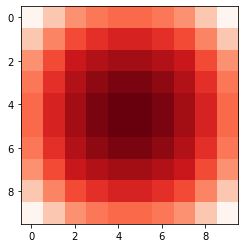

array([[10., 15., 19., 21., 22., 22., 21., 19., 15., 10.],
       [15., 20., 24., 26., 27., 27., 26., 24., 20., 15.],
       [19., 24., 28., 30., 31., 31., 30., 28., 24., 19.],
       [21., 26., 30., 32., 33., 33., 32., 30., 26., 21.],
       [22., 27., 31., 33., 34., 34., 33., 31., 27., 22.],
       [22., 27., 31., 33., 34., 34., 33., 31., 27., 22.],
       [21., 26., 30., 32., 33., 33., 32., 30., 26., 21.],
       [19., 24., 28., 30., 31., 31., 30., 28., 24., 19.],
       [15., 20., 24., 26., 27., 27., 26., 24., 20., 15.],
       [10., 15., 19., 21., 22., 22., 21., 19., 15., 10.]])

In [17]:
env.probabilityDensity()
actionList = np.argwhere(env.heatMap == np.amax(env.heatMap))
print(actionList)
env.showHeat()
env.heatMap

In [3]:
for x in arr:
    print((x*10/arr[0,0]).astype(int))

[10 14 18 20 21 21 20 19 15 10]
[14 19 22 24 25 25 24 22 19 15]
[18 23 25 27 28 28 27 26 22 18]
[20 24 27 29 30 30 29 27 24 20]
[21 25 28 29 30 30 29 28 25 21]
[21 25 28 29 30 30 29 28 25 21]
[20 24 27 28 29 29 28 27 24 20]
[18 22 26 27 28 28 27 26 23 18]
[15 19 23 24 25 25 24 22 19 15]
[10 15 19 20 21 21 20 19 14 10]


2480.0
2340.6305934186976
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 1 1 1 0 0]
 [0 0 2 2 2 2 2 1 1 0]
 [0 1 2 2 2 2 2 2 1 0]
 [0 1 2 3 3 3 3 2 1 0]
 [0 1 2 3 3 3 3 2 1 0]
 [0 1 2 3 3 3 3 2 1 0]
 [0 1 1 2 2 2 2 1 0 0]
 [0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


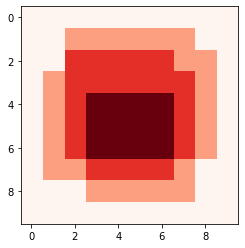

In [8]:
env = Battleship()
x = (env.heatMap - ((arr*10)/arr[0,0])).astype(int)
print(np.sum(env.heatMap))
print(np.sum(((arr*10)/arr[0,0])))
y = np.array([
    [0,1,1,1,1,1,1,1,1,0],
    [1,1,2,2,2,2,2,2,1,1],
    [1,2,2,3,3,3,3,2,2,1],
    [1,2,3,3,4,4,3,3,2,1],
    [1,2,3,4,5,5,4,3,2,1],
    [1,2,3,4,5,5,4,3,2,1],
    [1,2,3,3,4,4,3,3,2,1],
    [1,2,2,3,3,3,3,2,2,1],
    [1,1,2,2,2,2,2,2,1,1],
    [0,1,1,1,1,1,1,1,1,0]
    ])
plt.imshow(x, cmap='Reds')
print(x)

In [ ]:
env.heatMap

In [2]:
def deadZone(a):
    dead = list(env.deadShipLoc.values())
    deadShips = []

    for sublist in dead:
        for d in sublist:
            deadShips.append(d)
            
    return a in deadShips

def areaScan(a):
    
    y = a // 10
    x = a % 10

    arr = []
    hitPlaces = [a]
    target = ""

    if x > 0:
        if env.fired[y][x - 1] == 0:
            arr.append([env.heatMap[y][x - 1], a - 1, -1, "x"])
    if x < 9:
        if env.fired[y][x + 1] == 0:
            arr.append([env.heatMap[y][x + 1], a + 1, 1, "x"])
    if y > 0:
        if env.fired[y - 1][x] == 0:
            arr.append([env.heatMap[y - 1][x], a - 10, -10, "y"])
    if y < 9:
        if env.fired[y + 1][x] == 0:
            arr.append([env.heatMap[y + 1][x], a + 10, 10, "y"])
            
    if len(arr) == 0:
        return

    #arr.sort(reverse = True)

    while len(arr) != 0:
        
        flag = True
        
        if target != "":
            for i in range(len(arr)):
                if arr[i][3] == target:
                    flag = False
                    idx = i
                    ele = arr[idx]
                    break
                    
        if target == "" or flag:
            idx = arr.index(max(arr))
            ele = arr[idx]      
        
        action = ele[1]
        delta = ele[2]
        axis = ele[3]
        
        arr.pop(idx)
        
        if env.fired[action // 10][action % 10] != 0:
            continue

        info = env.step(action)
        
        if SHOW_RENDER:
            print(action, info, "Area")
            env.render()
            env.showHeat()

        if env.isdone():
            return

        if info == "Hit" or "Dead" in info:
            
            target = axis
            hitPlaces.append(action)
            
            if SHOW_RENDER:
                print("Looop")
            if "Dead" in info:
                if env.hitCount == env.deadCount:
                    if SHOW_RENDER:
                        print("Retreat")
                    return
                else:
                    if SHOW_RENDER:
                        print("Calling")
                        print(hitPlaces)
                    for hp in hitPlaces:
                        if not deadZone(hp):
                            areaScan(hp)      
                    return
                
            action += delta
            
            if action >= 0 and action < 100:
                if env.fired[action // 10][action % 10] == 0:
                    arr.append([env.heatMap[action // 10][action % 10], action, delta, target])
                    
    for hp in hitPlaces:
        if not deadZone(hp):
            areaScan(hp)   

In [12]:
SHOW_RENDER = False

env = Battleship()
scores = []

for _ in range(10000):
    
    done = False
    env.reset()
    moves = 0
    cp = env.matrix.tolist().copy()
    #print(env.matrix.tolist())
    while not done:
        
        env.probabilityDensity()
        
        #action = np.argmax(env.heatMap)
        
        actionList = np.argwhere(env.heatMap == np.amax(env.heatMap))
        #print(actionList)
        #print()
        moves = []
        for a in actionList:
            
            heatScore = 0
            y = a[0]
            x = a[1]
            
            if x > 0:
                heatScore += env.heatMap[y][x - 1]
            if x < 9:
                heatScore += env.heatMap[y][x + 1]
            if y > 0:
                heatScore += env.heatMap[y - 1][x]
            if y < 9:
                heatScore += env.heatMap[y + 1][x]
                
            moves.append([heatScore, a])
        
        moves = np.array(moves)
        #action = moves[random.choice(np.argwhere(moves[:,0] == moves[:,0].min())), 1][0]
        action = random.choice(actionList)
        action = action[0] * 10 + action[1]

        info = env.step(action)
        moves += 1
        
        done = env.isdone()
        if done:
            break

        if SHOW_RENDER:
            print(action, info, "Main")
            env.render()
            env.showHeat()

        if info == "Hit":
            areaScan(action)
        
        done = env.isdone()

    #print(f"{env.score}")
    scores.append(env.score)

print("\n")
print(f"Total = {sum(scores)}")
print(f"Count = {len(scores)}")
print(f"Mean = {sum(scores) / len(scores)}")
scores.sort()
print(f"Median = {scores[len(scores) // 2]}")

C:\Users\Asef\AppData\Local\Temp/ipykernel_2356/1634336019.py:40: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  moves = np.array(moves)




Total = 446488
Count = 10000
Mean = 44.6488
Median = 44


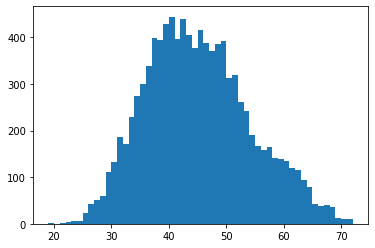

In [13]:
plt.hist(scores, bins=np.arange(min(scores), max(scores)+1))
plt.show()

In [ ]:
for i in range(min(scores), max(scores) + 1):
    print(f"{i},{scores.count(i)}")

In [ ]:
env = Battleship()
env.reset()

done = False
while not done:

    action = int(input())
    info = env.step(action)
    print(info)
    done = env.isdone()
    print(env.fired)
    
print(env.score)